# Análisis Exploratorio de Datos

En este notebook hacemos un análisis exploratorio del dataset de kaggle.

Origen de datos: `https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification`

# 0. Librerías

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme("notebook")


# 1. EDA

## 1.1 Carga de Datos

In [78]:
df_train = pd.read_csv('../data/raw/Corona_NLP_train.csv', encoding='ISO-8859-1')
df_test = pd.read_csv('../data/raw/Corona_NLP_test.csv', encoding='ISO-8859-1')


In [79]:
df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [80]:
df_test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


Eliminamos UserName y ScreenName ya que son simplemente ids

In [102]:
df_train = df_train.drop(columns=['UserName','ScreenName'])
df_test = df_test.drop(columns=['UserName','ScreenName'])

## 1.2 Shapes, tipos de datos, nulos

In [103]:
df_train.shape

(41157, 6)

In [105]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Location       32567 non-null  object
 1   TweetAt        41157 non-null  object
 2   OriginalTweet  41157 non-null  object
 3   Sentiment      41157 non-null  object
 4   length_w       41157 non-null  int64 
 5   length_c       41157 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [106]:
df_train.isnull().sum()

Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
length_w            0
length_c            0
dtype: int64

In [107]:
df_train['Location'].isnull().sum()/df_train.shape[0]

np.float64(0.2087129771363316)

In [108]:
df_test.shape

(3798, 4)

In [109]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Location       2964 non-null   object
 1   TweetAt        3798 non-null   object
 2   OriginalTweet  3798 non-null   object
 3   Sentiment      3798 non-null   object
dtypes: object(4)
memory usage: 118.8+ KB


In [110]:
df_test.isnull().sum()

Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [111]:
df_test['Location'].isnull().sum()/df_test.shape[0]

np.float64(0.21958925750394945)

Eliminamos la columna `Location` ya que tiene más del 20% de nulos y no necesariamente tiene un impacto sobre el análisis de sentimiento de los tweets.

In [112]:
df_train = df_train.drop(columns=['Location'])
df_test = df_test.drop(columns=['Location'])

## 1.3 Unique values

In [113]:
df_train['TweetAt'].unique()

array(['16-03-2020', '17-03-2020', '18-03-2020', '19-03-2020',
       '20-03-2020', '21-03-2020', '22-03-2020', '23-03-2020',
       '24-03-2020', '25-03-2020', '26-03-2020', '27-03-2020',
       '28-03-2020', '29-03-2020', '30-03-2020', '31-03-2020',
       '01-04-2020', '02-04-2020', '03-04-2020', '04-04-2020',
       '05-04-2020', '06-04-2020', '07-04-2020', '08-04-2020',
       '09-04-2020', '10-04-2020', '11-04-2020', '12-04-2020',
       '13-04-2020', '14-04-2020'], dtype=object)

In [114]:
df_test['TweetAt'].unique()

array(['02-03-2020', '03-03-2020', '04-03-2020', '05-03-2020',
       '06-03-2020', '07-03-2020', '08-03-2020', '09-03-2020',
       '10-03-2020', '11-03-2020', '12-03-2020', '13-03-2020',
       '14-03-2020', '15-03-2020', '16-03-2020'], dtype=object)

Eliminamos la columna `TweetAt`, ya que el periodo cubierto por los datos es de solo mes y medio. Esta ventana de tiempo es demasiado corta para identificar una relación clara entre la evolución temporal de la pandemia y el sentimiento expresado en los tweets.

In [115]:
df_train = df_train.drop(columns=['TweetAt'])
df_test = df_test.drop(columns=['TweetAt'])

## 1.4 Distribución de clases

In [116]:
df_train['Sentiment'].value_counts()

Sentiment
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64

In [117]:
df_train['Sentiment'].value_counts(normalize=True)

Sentiment
Positive              0.277523
Negative              0.240955
Neutral               0.187404
Extremely Positive    0.160945
Extremely Negative    0.133173
Name: proportion, dtype: float64

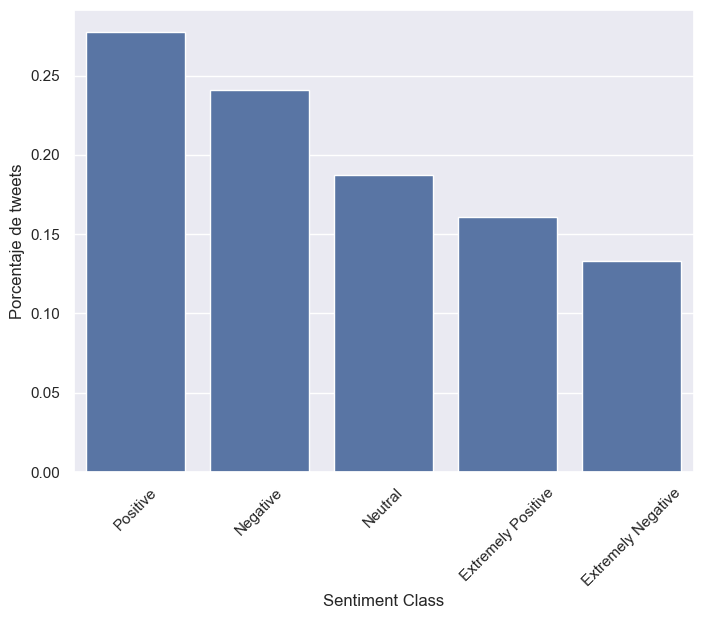

In [118]:
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x=df_train['Sentiment'].value_counts(normalize=True).index, y=df_train['Sentiment'].value_counts(normalize=True).values, ax=ax)
ax.set_xlabel('Sentiment Class')
ax.set_ylabel('Porcentaje de tweets')
plt.xticks(rotation=45)

plt.show()


En el dataset de train e observa un desbalanceo fuerte entre las clases. Por ejemplo, la clase `Positive` tiene más del doble de observaciones que `Extremely Negative`.

In [119]:
df_test['Sentiment'].value_counts()

Sentiment
Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: count, dtype: int64

In [120]:
df_test['Sentiment'].value_counts(normalize=True)

Sentiment
Negative              0.274092
Positive              0.249342
Neutral               0.162981
Extremely Positive    0.157715
Extremely Negative    0.155872
Name: proportion, dtype: float64

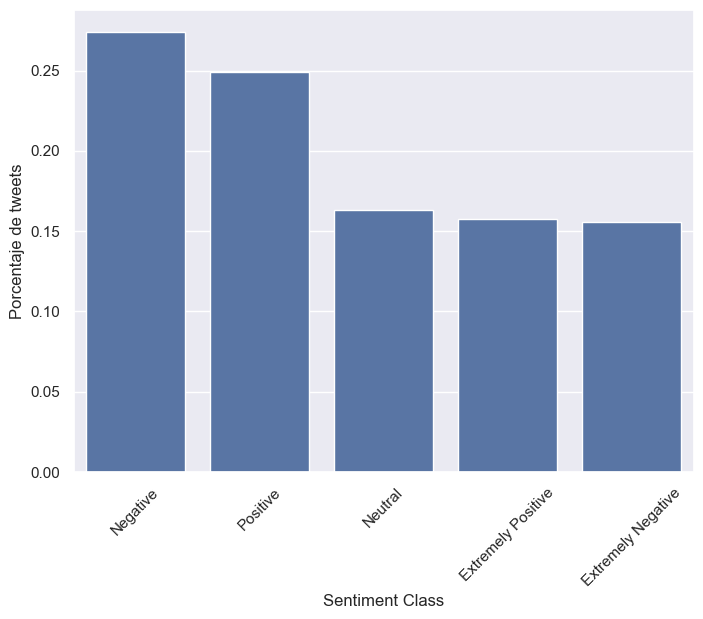

In [121]:
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x=df_test['Sentiment'].value_counts(normalize=True).index, y=df_test['Sentiment'].value_counts(normalize=True).values, ax=ax)
ax.set_xlabel('Sentiment Class')
ax.set_ylabel('Porcentaje de tweets')
plt.xticks(rotation=45)

plt.show()


En el dataset de test también se observa un desbalance entre las clases, sin embargo, está marcado por dos grupos diferentes.

Dado el desbalance observado en ambos conjuntos de datos, es fundamental aplicar una estrategia adecuada para mitigar su impacto en el modelo. En el caso de modelos Transformers aplicados a tareas de NLP, la práctica recomendada consiste en ajustar la función de pérdida mediante pesos de clase. Por lo tanto, implementaremos una función de pérdida ponderada que incorpore estos pesos durante el entrenamiento.

## 1.5 Longitud de los tweets

In [122]:
# Creamos las variables de cantidad de palabras (length_w) y cantidad de caracteres (length_c)
df_train['length_w'] = df_train['OriginalTweet'].apply(lambda x: len(str(x).split()))
df_train['length_c'] = df_train['OriginalTweet'].apply(lambda x: len(str(x)))

df_train

,OriginalTweet,Sentiment,length_w,length_c
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,8,111
1,advice Talk to your neighbours family to excha...,Positive,38,237
2,Coronavirus Australia: Woolworths to give elde...,Positive,14,131
3,My food stock is not the only one which is emp...,Positive,42,306
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,40,310
...,...,...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral,12,102
41153,Response to complaint not provided citing COVI...,Extremely Negative,23,138
41154,You know itÂs getting tough when @KameronWild...,Positive,18,136
41155,Is it wrong that the smell of hand sanitizer i...,Neutral,18,111


In [125]:
df_train.describe()

,length_w,length_c
count,41157.000000,41157.000000
mean,30.500304,204.200160
std,11.591172,68.655129
min,1.000000,11.000000
25%,21.000000,151.000000
50%,32.000000,215.000000
75%,40.000000,259.000000
max,64.000000,355.000000


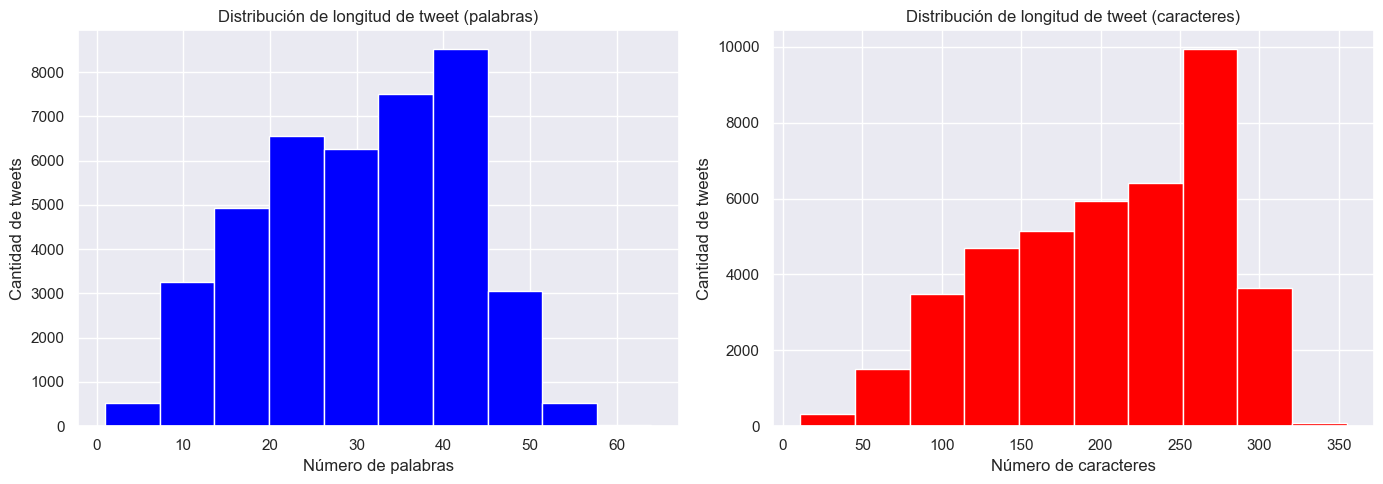

In [129]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Graficamos histograma de la cantidad de palabras por tweet
axs[0].hist(df_train['length_w'],  color='blue')
axs[0].set_title("Distribución de longitud de tweet (palabras)")
axs[0].set_xlabel("Número de palabras")
axs[0].set_ylabel("Cantidad de tweets")

# Graficamos histograma de la cantidad de caracteres por tweet
axs[1].hist(df_train['length_c'], color='red')
axs[1].set_title("Distribución de longitud de tweet (caracteres)")
axs[1].set_xlabel("Número de caracteres")
axs[1].set_ylabel("Cantidad de tweets")

plt.tight_layout()
plt.show()


Observamos que en promedio los tweets tienen 30 palabras y 204 caracteres. 

## 1.6 Longitud de Tokens

Revisamos la distribución de las longitudes de los tweets en tokens para encontrar el valor máximo y usarlo como hiperparámetro.

In [135]:
from transformers import AutoTokenizer

# Definimos el modelo que vamos a usar
model = 'bert-base-uncased'

# Cargamos el tokenizer para el modelo especificado
tokenizer = AutoTokenizer.from_pretrained(model)

# Tokenizamos cada tweet y calculamos la longitud en tokens
df_train['length_t'] = df_train['OriginalTweet'].apply(lambda x:len(tokenizer.encode(str(x), truncation=False)))

df_train

,OriginalTweet,Sentiment,length_w,length_c,length_t
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,8,111,60
1,advice Talk to your neighbours family to excha...,Positive,38,237,42
2,Coronavirus Australia: Woolworths to give elde...,Positive,14,131,38
3,My food stock is not the only one which is emp...,Positive,42,306,90
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,40,310,90
...,...,...,...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral,12,102,35
41153,Response to complaint not provided citing COVI...,Extremely Negative,23,138,31
41154,You know itÂs getting tough when @KameronWild...,Positive,18,136,37
41155,Is it wrong that the smell of hand sanitizer i...,Neutral,18,111,30


In [144]:
df_train.describe(percentiles=[0,.25,.50,.75,.85,.90,.95,1])

,length_w,length_c,length_t
count,41157.000000,41157.000000,41157.000000
mean,30.500304,204.200160,54.976407
std,11.591172,68.655129,20.288277
min,1.000000,11.000000,3.000000
0%,1.000000,11.000000,3.000000
25%,21.000000,151.000000,40.000000
50%,32.000000,215.000000,55.000000
75%,40.000000,259.000000,69.000000
85%,43.000000,278.000000,76.000000
90%,45.000000,285.000000,81.000000


Podemos usar como `max_length=128`, ya que el 95% de los tweets tienen 88 tokens o menos. Con este máximo podemos cubrir perfecto la mayoría del dataset

## 1.7 Conclusiones EDA

- Las columnas de `UserName` y `ScreenName` son ids de los usuarios, por lo cual deben ser descartadas para el fine-tunning del modelo

- El dataset solo tiene información de un mes y medio de datos, por lo cual la columna de `TweetAt` no es una buena variable para incluir en el entrenamiento, ya que no proporciona suficiente data temporal para relacionar el sentiment-analysis con el desarrollo de la pandemia.

- La columna `Location` tiene más del 21% de nulos, por lo cual la excluímos del análisis.

- Es necesario implementar una función de pérdida ponderada para mitigar el desbalance de las clases.

- Tras analizar la distribución de longitud de los tweets en tokens utilizando el tokenizer de BERT, determinamos que un valor de `max_length = 128` es suficiente para representar adecuadamente la mayoría de los ejemplos, manteniendo un equilibrio entre cobertura y eficiencia computacional.